# Data Analysis and Vis, HW 5
*Adapted from COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: July 11

In this homework, you will use classification methods to classify handwritten digits (Part 1) and predict the popularity of online news (Part 2). We hope these exercises will give you an idea of the broad usage of classificaiton methods. 

In [80]:
# imports and setup 

import pandas as pd
import numpy as np
import seaborn as sns; 
sns.set()

import math

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part1: MNIST handwritten digits

THE MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. You will see that images are just matrices with scalar values, and that we can use all the classifcation algorithms we studied on them.  We saw these in class when we looked at clustering methods.

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various classification methods. 
For example, [this webpage](http://yann.lecun.com/exdb/mnist/) gives a comparison of a variety of different classification methods on MNIST (Note that the tests on this website are for higher resolution images than we'll use.) 

In this problem, we'll use scikit-learn to compare classification methods on the MNIST dataset. 

There are several versions of the MNIST dataset. We'll use the one that is built-into scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10 (one for each digit)
* Samples total: 1797
* Samples per class: $\approx$180
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16 (grayscale value; 0 is white, 16 is black)

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

Note that we will scale the data before running them through our algorithms, which will also alter their appearance when we plot them. You can read details about scaling and why it's important [here](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).

In [81]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


In [82]:
# this is what one digit (a zero) looks like
print("===\nThe raw data")
print(digits.images[0])
print("===\nThe scaled data")
print(X[0])
print("===\nThe digit")
print(digits.target[0])

===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -

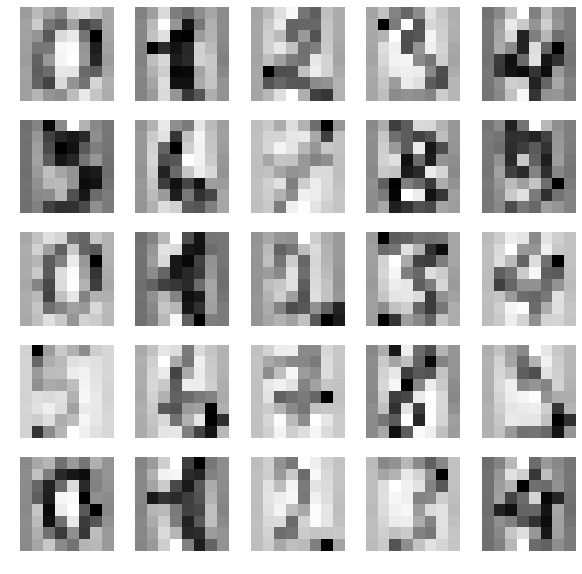

In [83]:
plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

You might find [this webpage](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) helpful. 

### Task 1.1: Classification with Support Vector Machines (SVM)

1. Split the data into a training and test set using the command 
```
train_test_split(X, y, random_state=1, test_size=0.8)
```
+ Use SVM with an `rbf` kernel and parameter `C=100` to build a classifier using the *training dataset*.
+ Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? 
+ Print all of these misclassified digits as images. 
+ Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 500. What is the best value? 
+ Try to train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?

# 1.1-1

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)

# 1.1-2

In [85]:
classi = svm.SVC(C=100.0, cache_size=100, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

classi.fit(X_train, y_train)

results = classi.predict(X_test)
score = cross_val_score(estimator = classi, X = X_test, y = y_test, cv = 5, scoring='accuracy', verbose = True)
score.mean()

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


0.9819593794330175

# 1.1-3

In [86]:
misclassified = []
misclassified_count = {
    "0" : 0,
    "1" : 0,
    "2" : 0,
    "3" : 0,
    "4" : 0,
    "5" : 0,
    "6" : 0,
    "7" : 0,
    "8" : 0,
    "9" : 0,
}
# count the number of misclassified digits for each category
for x in range (0, len(X_test)):
    if (y_test[x] != results[x]):
        misclassified_count[str(y_test[x])] += 1
        misclassified.append(x)
cm=metrics.confusion_matrix(y_test, results)
cm

array([[130,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 139,   2,   0,   1,   0,   0,   0,   7,   0],
       [  0,   3, 138,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   1, 141,   0,   0,   0,   1,   3,   1],
       [  0,   0,   0,   0, 152,   0,   0,   0,   0,   0],
       [  0,   0,   0,   2,   0, 143,   0,   0,   1,   1],
       [  0,   2,   0,   0,   0,   0, 143,   0,   1,   0],
       [  0,   0,   0,   0,   1,   0,   0, 138,   0,   1],
       [  0,  10,   1,   1,   1,   0,   0,   0, 118,   2],
       [  0,   1,   0,   3,   0,   3,   0,   0,   3, 142]])

In [87]:
misclassified_count

{'0': 0,
 '1': 10,
 '2': 4,
 '3': 6,
 '4': 0,
 '5': 4,
 '6': 3,
 '7': 2,
 '8': 15,
 '9': 10}

[Text(0,0.5,'# Mis-classified'), Text(0.5,0,'Number')]

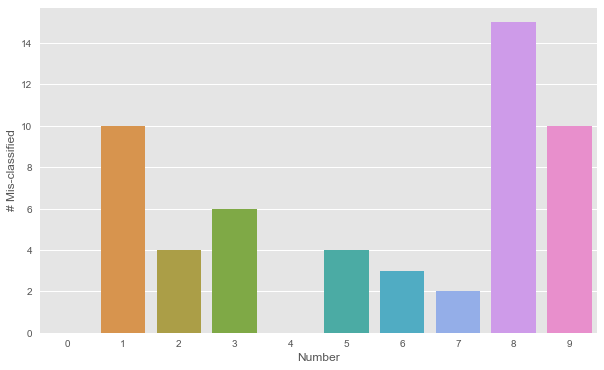

In [88]:
class_counts = pd.DataFrame(misclassified_count, index=[0])
ax = sns.barplot(data=class_counts)
ax = sns.barplot(data=class_counts)
ax.set(xlabel='Number', ylabel='# Mis-classified')

It looks like we have the most trouble with '1', '8', and '9'.
# 1.1-4

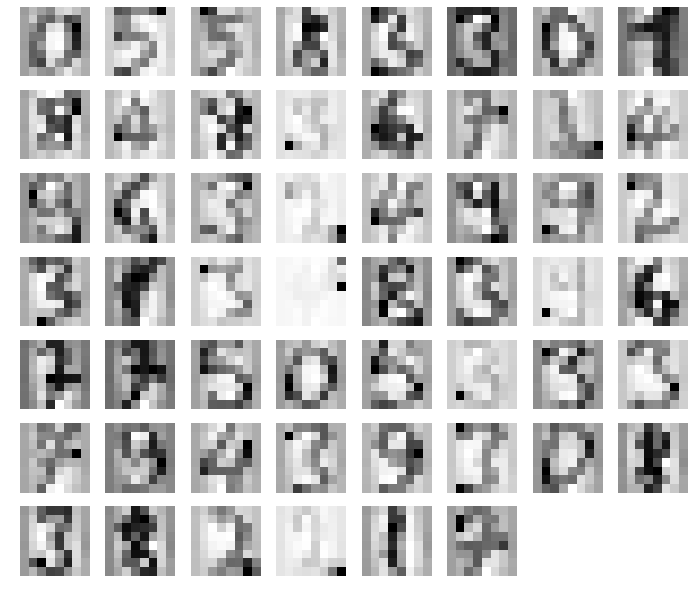

In [89]:
size = int(math.ceil(math.sqrt(len(misclassified))))

plt.figure(figsize= (12, 12)) 
for ii in np.arange(len(misclassified)):
    plt.subplot(size, size, ii+1)
    plt.imshow(np.reshape(X[misclassified[ii]],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

# 1.1-5

In [90]:
score = cross_val_score(estimator = classi, X = X_test, y = y_test, cv = 5, scoring='accuracy', verbose = True)
print(score)

[0.98287671 0.97594502 0.96503497 0.99298246 0.99295775]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [91]:
scores = []
C = []
for i in range(1, 500, 5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)
    classi = svm.SVC(C=i, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

    classi.fit(X_train, y_train)
    scores.append(sum(cross_val_score(estimator = classi, X = X_test, y = y_test, cv = 5, scoring='accuracy'))/5)
    C.append(i)

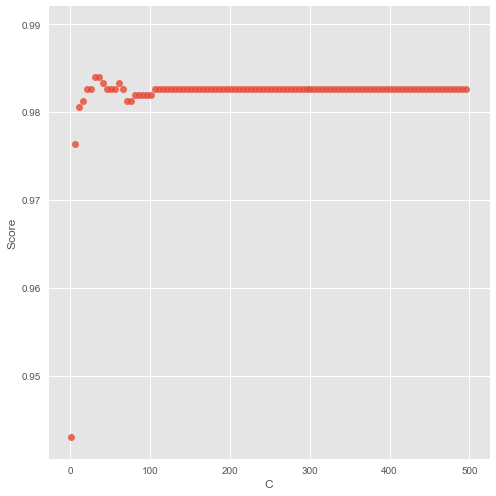

In [92]:
df = pd.DataFrame(
    {
        'C' : C, 
        'Score' : scores
    })

sns.lmplot(x="C", y="Score", data=df, fit_reg=False, size = 7)

In [93]:
opt_C = df["C"][df["Score"].idxmax()]
opt_C

31

The optimum C value is 31.

In [94]:
classi = svm.SVC(C=opt_C, cache_size=100, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
sum(cross_val_score(estimator = classi, X = X_test, y = y_test, cv = 5, scoring='accuracy'))/5

0.9840213350732663

# 1.1-6

In [95]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(digits.data, digits.target, random_state=1, test_size=0.8)
X = digits.data
classi2 = svm.SVC(C=100.0, cache_size=100, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

classi2.fit(X_train_raw, y_train_raw)
results2 = classi2.predict(X_test_raw)

misclassified2 = []
misclassified_count2 = {
    "0" : 0,
    "1" : 0,
    "2" : 0,
    "3" : 0,
    "4" : 0,
    "5" : 0,
    "6" : 0,
    "7" : 0,
    "8" : 0,
    "9" : 0,
}
# count the number of misclassified digits for each category
for x in range (0, len(X_test_raw)):
    if (y_test_raw[x] != results2[x]):
        misclassified_count2[str(y_test_raw[x])] += 1
        misclassified2.append(x)
cm=metrics.confusion_matrix(y_test_raw, results2)
misclassified_count2

{'0': 1,
 '1': 5,
 '2': 6,
 '3': 7,
 '4': 1,
 '5': 6,
 '6': 2,
 '7': 1,
 '8': 4,
 '9': 8}

[Text(0,0.5,'# Mis-classified'), Text(0.5,0,'Number')]

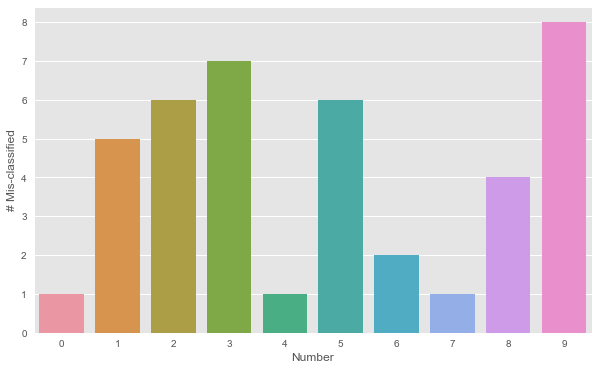

In [96]:
class_counts2 = pd.DataFrame(misclassified_count2, index=[0])
ax = sns.barplot(data=class_counts2)
ax.set(xlabel='Number', ylabel='# Mis-classified')

In [97]:
sum(cross_val_score(estimator = classi2, X = X_test_raw, y = y_test_raw, cv = 5, scoring='accuracy'))/5

0.9902646257467221

In [98]:
scores2 = []
C2 = []
for i in range(1, 500, 5):
    X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=1, test_size=0.8)
    classi2 = svm.SVC(C=100., kernel='rbf')

    classi2.fit(X_train_raw, y_train_raw)
    scores.append(sum(cross_val_score(estimator = classi, X = X_test_raw, y = y_test_raw, cv = 5, scoring='accuracy'))/5)
    C.append(i)

In [99]:
df2 = pd.DataFrame(
    {
        'C' : C, 
        'Score' : scores
    })

opt_C2 = df2["C"][df2["Score"].idxmax()]
opt_C2

1

In [100]:
classi2 = svm.SVC(C=opt_C2, cache_size=100, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
classi2.fit(X_train_raw, y_train_raw)
cross_val_score(estimator = classi2, X = X_test_raw, y = y_test_raw, cv = 5, scoring='accuracy').mean()

0.9930355438456864

Oddly, the raw data came in with a slightly better average accuracy score (99.3%) than the scaled data. This seems a little counterintutitve, but while the scaled data resulted in a trained model with a lower overall inaccuracy (across all sets), it had a higher inaccuracy than the un-scaled model for the numerals it had problems with (1, 8, and 9). This allowed it to sligthly edge out the scaled data in terms of average accuracy score.

The simpler model with the same optimum C however does not perform well at all (42.8%). So the 'ovr' is somehow performing some of the scaling for us, and is doing a very good job with just the raw data alone. It certainly shows that scaling the data is an important part of 

In [101]:
classi2 = svm.SVC(C=opt_C2, kernel='rbf')
classi2.fit(X_train_raw, y_train_raw)
cross_val_score(estimator = classi2, X = X_test_raw, y = y_test_raw, cv = 5, scoring='accuracy').mean()

0.42810530936520064

### Task 1.2: Prediction with k-nearest neighbors
Repeat task 1.1 using k-nearest neighbors (k-NN). In part 1, use k=10. In part 3, find the best value of k. 

# 1.2

In [102]:
k = 10
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)

print('Confusion Matrix:')
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 146   0   1   1   1   0   0   0   0]
 [  2   3 128   0   0   0   0   2   7   0]
 [  0   0   0 135   0   2   0   6   3   1]
 [  0   0   0   0 150   0   0   2   0   0]
 [  0   0   0   3   1 139   1   0   0   3]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 140   0   0]
 [  0   6   2   4   0   1   0   1 117   2]
 [  2   8   0   6   0   3   0   9   3 121]]
Accuracy =  0.9388038942976356


## Optimize k (out of curiosity)

In [103]:
knn_scores = []
k_list = []

for i in range(1, 50, 1):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    k_list.append(i)
    knn_scores.append(metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

In [104]:
knn_df = pd.DataFrame(
{
    'k' : k_list, 
    'Score' : knn_scores
})
opt_k = knn_df["k"][knn_df["Score"].idxmax()]
opt_k

1

The optimum k is 1.

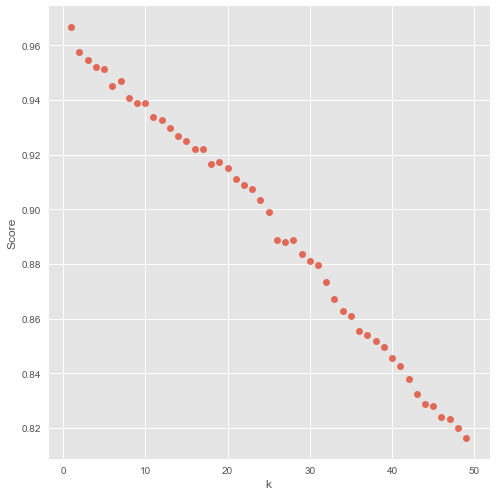

In [105]:
sns.lmplot(x="k", y="Score", data=knn_df, fit_reg=False, size = 7)

# Part 2: Popularity of online news

For this problem, you will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. You can learn details about the datasetat the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 
This dataset was first used in the following conference paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. *Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence* (2015).

The dataset contains variables describing 39,644 articles published between January 7, 2013 and Januyary 7, 2015 on the news website, [Mashable](http://mashable.com/). 
There are 61 variables associated with each article. Of these, 58 are *predictor* variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article. The number of shares is what we will use to define whether or not the article was *popular*, which is what we will try to predict. You should read about the predictor variables in the file *OnlineNewsPopularity.names*. Further details about the collection and processing of the articles can be found in the conference paper. 


### Task 2.1 Import the data 
* Use the pandas.read_csv() function to import the dataset.
* To us[scikit-learn](http://scikit-learn.org), we'll need to save the data as a numpy array. Use the *DataFrame.as_matrix()* command to export the predictor variables as a numpy array called *X* this array should not include our target variable (the number of shares). We don't need the url and timedelta, so let's drop these columns. 
* Export the number of shares as a separate numpy array, called *shares*. We'll define an article to be popular if it received more shares than the median number of shares. Create a binary numpy array, *y*, which indicates whether or not each article is popular.

In [143]:
# Your code here.  Note the data and description are in the OnlineNewsPopularity directory
import os

filepath='/Users/adam/Box Sync/milesar/CS 6017/Homework5/OnlineNewsPopularity/'
os.chdir(filepath)
df = pd.read_csv(f'OnlineNewsPopularity.csv')
df.dtypes

url                                object
 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       

In [144]:
df.dtypes
df = df.drop(columns=['url', ' timedelta'])
#there was a really annoying bug in the input, where 'timedelta' column name included a leading space.

In [145]:
X = df.as_matrix()
X.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(39644, 59)

In [146]:
shares = df[' shares'].as_matrix()
df = df.drop(columns=[' shares'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [147]:
median_shares = np.median(shares)
popular = np.where(shares>=median_shares, 1, 0)

### Task 2.2 Exploratory data analysis 

First check to see if the values are reasonable. What are the min, median, and maximum number of shares? 

In [148]:
from scipy import stats
stats.describe(shares)

DescribeResult(nobs=39644, minmax=(1, 843300), mean=3395.3801836343455, variance=135185983.71157262, skewness=33.9625997792866, kurtosis=1832.4413727401281)

min = 1
max = 843300
mean = 3395

These values seem reasonable, but I am struggling to understand why the variance is so high. It seems unreasonably high, unless it is the square of the variance (the mean squared is 11E6, but the variance is 135E6). The docs say that the variance is 'the unbiased variance of the data along the axis'. But the other values seem reasonable. The kurtosis is an interesting metric that I was previously unaware of (by this name). 


### Task 2.3 Classification using k-NN

Develop a k-NN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? 

In [149]:
# Your code here
k = 3
y = popular
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)

In [150]:
knn_scores = []
k_list = []
p_list = []

for k in range(1, 50, 1):
    for p in range(1, 10, 1):
        clf = clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
               metric_params=None, n_jobs=1, n_neighbors=k, p=p,
               weights='uniform')
        clf.fit(X_train, y_train)
        k_list.append(k)
        knn_scores.append(metrics.accuracy_score(y_true = y_test, y_pred = y_test))
        p_list.append(p)
    
knn_df = pd.DataFrame(
{
    'k' : k_list, 
    'Score' : knn_scores,
    'p' : p_list
})
opt_k = knn_df["k"][knn_df["Score"].idxmax()]
opt_p = knn_df["p"][knn_df["Score"].idxmax()]
print('optimum k = ' + str(opt_k))
print('optimum p = ' + str(opt_p))

optimum k = 1
optimum p = 1


In [50]:
clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=opt_k, p=opt_p,
           weights='uniform')
clf.fit(X_train, y_train)

print('Confusion Matrix:')
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix:
[[10272  4451]
 [ 6166 10827]]
Accuracy =  0.6652478244419221


In [51]:
clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=opt_k, p=opt_p,
           weights='uniform')
for i in range(0,1000,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=None, test_size=0.8)
    clf.fit(X_train, y_train)

In [52]:
print('Confusion Matrix:')
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix:
[[10235  4595]
 [ 5966 10920]]
Accuracy =  0.6670134947660487


I was able to get an accuracy of 0.66 for non-scaled data, with the shared metric reduced to a binary field for popularity. This certainly made the computation a bit easier, but the median cutoff for popularity was a little arbitrary (no reason to change it, since it makes the most sense as a first past measure of popularity). Perhaps some normalization or scaling of a few of the other metrics could have helped us. Still, its better than a coin toss at prediciting popularity. 

It seemed interesting to try to find out which feature might be contributing the most, so they were tested one at a time. This isnt exactly a great strategy, but it seemed like an interesting experiment.

In [57]:
X = df.as_matrix()
n_feats = X.shape[1]
print(n_feats)
features = list(df)
print('FeatureIndex\t\tW/O Feature\t\tAccuracy')
feature_index = []
feature_scores = []
for i in range(0, n_feats):
    X_head = np.atleast_2d(X[:, 0:i])
    X_tail = np.atleast_2d(X[:, i+1:])
    X = np.hstack((X_head, X_tail))
    scores = cross_val_score(clf, X, y)
    feature_scores.append(1-scores.mean())
    print('%d\t\t%s\t\t%g' % (i, features[i], 1-scores.mean()))
    feature_index.append(i)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


58
FeatureIndex		W/O Feature		Accuracy
0		 n_tokens_title		0.46239
1		 n_tokens_content		0.462415
2		 n_unique_tokens		0.462415
3		 n_non_stop_words		0.462415
4		 n_non_stop_unique_tokens		0.462415
5		 num_hrefs		0.462365
6		 num_self_hrefs		0.46239
7		 num_imgs		0.46239
8		 num_videos		0.46239
9		 average_token_length		0.460801
10		 num_keywords		0.458329
11		 data_channel_is_lifestyle		0.457319
12		 data_channel_is_entertainment		0.458152
13		 data_channel_is_bus		0.461053
14		 data_channel_is_socmed		0.455529
15		 data_channel_is_tech		0.455503
16		 data_channel_is_world		0.455554
17		 kw_min_min		0.45563
18		 kw_max_min		0.455705
19		 kw_avg_min		0.455907
20		 kw_min_max		0.455857
21		 kw_max_max		0.455882
22		 kw_avg_max		0.455907
23		 kw_min_avg		0.456058
24		 kw_max_avg		0.456008
25		 kw_avg_avg		0.455932
26		 self_reference_min_shares		0.455983
27		 self_reference_max_shares		0.455983
28		 self_reference_avg_sharess		0.455958
29		 weekday_is_monday		0.455958
30		 weekday_is_tue

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


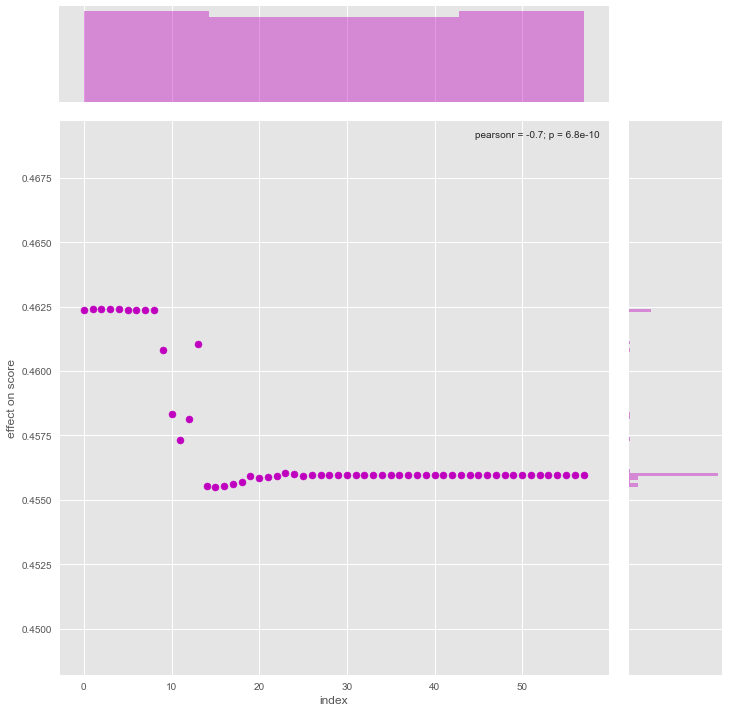

In [54]:
knn_df = pd.DataFrame(
{
    'index' : feature_index, 
    'feature' : features,
    'effect on score' : feature_scores
})
g = sns.jointplot("index", "effect on score", data=knn_df, color="m", size = 10)

It seems like some of the NLP features are a little more useful than the other metrics in the set. But the differences are very slight.

### Task 2.4 Classification using SVM

Develop a support vector machine classification model for the data. 
 
 * SVM is computationally expensive, so start by using only a fraction of the data, say 5,000 articles. 
 * Experimt with different Cs. Which is the best value for C?

Note that it takes multiple minutes per value of C to run on the whole dataset!

In [60]:
# Your code here
y_short = y[:5000]
X_short = X[:5000, : ]

In [152]:
scores = []
C = []
for i in range(1, 100, 1):
    X_train, X_test, y_train, y_test = train_test_split(X_short, y_short, random_state=1, test_size=0.8)
    classi = svm.SVC(C=i, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

    classi.fit(X_train, y_train)
    scores.append(cross_val_score(estimator = classi, X = X_test, y = y_test, cv = 5, scoring='accuracy').mean())
    C.append(i)

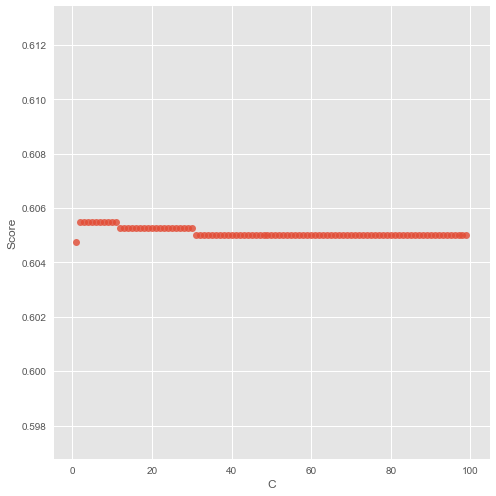

In [153]:
df = pd.DataFrame(
    {
        'C' : C, 
        'Score' : scores
    })

sns.lmplot(x="C", y="Score", data=df, fit_reg=False, size = 7)

In [70]:
opt_C = df["C"][df["Score"].idxmax()]
opt_C

2

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)
classi = svm.SVC(C=opt_C, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

0.541083324087341

In [76]:
classi.fit(X_train, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
cross_val_score(estimator = classi, X = X_test, y = y_test, cv = 3, scoring='accuracy', verbose = True).mean()

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.7min finished


0.5396960586670967

### Task 2.5 Classification using decision trees

Develop a decision tree classification model for the data. 

Use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 

In [316]:
from IPython.display import Image, display  
import pydotplus 
from scipy import misc

def renderTree(my_tree, features):
    # hacky solution of writing to files and reading again
    # necessary due to library bugs
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree, 
                                 out_file=f, 
                                 feature_names=features, 
                                 class_names=["Popular", "Not"],  
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True)
  
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "temp.png"
    graph.write_png(image_name)  
    display(Image(filename=image_name))

In [342]:
# Your code here
# I decided to proceed with some fairly naive exploration, 
# by categories mentioned in the study (NLP, etc)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv(f'OnlineNewsPopularity.csv')
df.columns = df.columns.map(lambda x: x.strip())
df = df.drop(columns=['url', 'timedelta'])
median = df['shares'].median()

df['popular'] = np.where(df['shares']>=median, 1, 0)
y = df['popular'].copy()

df = df.drop(columns=['shares', 'popular'])
X = df

def splitData(features):
    X_main = X[features].as_matrix()
    y_main = y.as_matrix()
    # Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(X_main, y_main, random_state=1, test_size=0.8)
    return XTrain, XTest, yTrain, yTest

model = DecisionTreeClassifier(max_leaf_nodes=None, random_state=0)
X_train, X_test, y_train, y_test = splitData(features)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [362]:
X[features]

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
5                10.0             370.0         0.559889               1.0   
6                 8.0             960.0         0.418163               1.0   
7                12.0             989.0         0.433574               1.0   
8                11.0              97.0         0.670103               1.0   
9                10.0             231.0         0.636364               1.0   
10                9.0            1248.0         0.490050               1.0   
11               10.0             187.0         0.666667               1.0   
12                9.0             274.0         0.609195               1.0   
13                9.0             285.0         0.744186               1.0   
14                8.0             259.0         0.562753               1.0   
15               12.0             682.0         0.459542               1.0   
16                8.0            1118.0         0.512397               1.0   
17                8.0             397.0         0.624679               1.0   
18               11.0             103.0         0.689320               1.0   
19                8.0            1207.0         0.410579               1.0   
20               13.0            1248.0         0.390638               1.0   
21                9.0             391.0         0.510256               1.0   
22               11.0            1154.0         0.427305               1.0   
23               11.0             125.0         0.674797               1.0   
24               13.0             244.0         0.560000               1.0   
25                8.0             266.0         0.572581               1.0   
26                8.0             331.0         0.562691               1.0   
27               12.0            1225.0         0.385452               1.0   
28               10.0             243.0         0.619247               1.0   
29               11.0             723.0         0.490934               1.0   
...               ...               ...              ...               ...   
39614             9.0             904.0         0.472158               1.0   
39615            11.0               0.0         0.000000               0.0   
39616            15.0               0.0         0.000000               0.0   
39617            11.0             991.0         0.459173               1.0   
39618            14.0             488.0         0.517454               1.0   
39619            14.0             428.0         0.512881               1.0   
39620            13.0             413.0         0.556675               1.0   
39621             9.0             468.0         0.582781               1.0   
39622            11.0            1122.0         0.439421               1.0   
39623            14.0             436.0         0.529412               1.0   
39624            12.0             429.0         0.514925               1.0   
39625            13.0             224.0         0.570136               1.0   
39626            12.0             249.0         0.567227               1.0   
39627            14.0             874.0         0.480702               1.0   
39628            14.0             626.0         0.552504               1.0   
39629            13.0             209.0         0.656863               1.0   
39630            12.0             491.0         0.454167               1.0   
39631            13.0             746.0         0.465306               1.0   
39632            15.0             580.0         0.506261               1.0   
39633             9.0        

Looking over the data, we can see there are a few columns that dont have much of a range, and might not end up being particularly good features (like n_stop_words). We will want to curate this list quite a lot.

In [344]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [345]:
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.5682305460966074

In [346]:
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
)

0     1
0  8150  6573
1  7121  9872

Not even going to attempt rendering this tree, as it is going to be pretty unintelligible. I thought it might be fairly interesting to modify the height of the tree with all features before performing any explorations on the subsets.

In [347]:
accuracy = []
height = []
for n in range(2, 100, 2):
    height.append(n)
    model = DecisionTreeClassifier(max_leaf_nodes=n, random_state=0)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_predict))

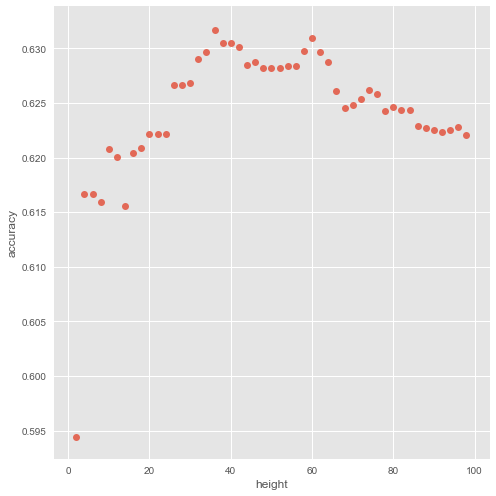

In [348]:
results = pd.DataFrame(
{
    'accuracy' : accuracy, 
    'height' : height
})

sns.lmplot(x="height", y="accuracy", data=results, fit_reg=False, size = 7)

In [349]:
opt_height = results["height"][results["accuracy"].idxmax()]
opt_height

36

The optimum height for the full data sets is 36, given us a max accuracy of ~65%. This is not much better than the height of 2 baseline, or the height of 4 measurement of ~61.5%

Next, I thought it might be interesting to explore some of the feature categories in the set.

In [404]:
features = list(X.columns.values)
i = 0
for c in features:
    print(str(i) + "\t" + c)
    i += 1

0	n_tokens_title
1	n_tokens_content
2	n_unique_tokens
3	n_non_stop_words
4	n_non_stop_unique_tokens
5	num_hrefs
6	num_self_hrefs
7	num_imgs
8	num_videos
9	average_token_length
10	num_keywords
11	data_channel_is_lifestyle
12	data_channel_is_entertainment
13	data_channel_is_bus
14	data_channel_is_socmed
15	data_channel_is_tech
16	data_channel_is_world
17	kw_min_min
18	kw_max_min
19	kw_avg_min
20	kw_min_max
21	kw_max_max
22	kw_avg_max
23	kw_min_avg
24	kw_max_avg
25	kw_avg_avg
26	self_reference_min_shares
27	self_reference_max_shares
28	self_reference_avg_sharess
29	weekday_is_monday
30	weekday_is_tuesday
31	weekday_is_wednesday
32	weekday_is_thursday
33	weekday_is_friday
34	weekday_is_saturday
35	weekday_is_sunday
36	is_weekend
37	LDA_00
38	LDA_01
39	LDA_02
40	LDA_03
41	LDA_04
42	global_subjectivity
43	global_sentiment_polarity
44	global_rate_positive_words
45	global_rate_negative_words
46	rate_positive_words
47	rate_negative_words
48	avg_positive_polarity
49	min_positive_polarity
50	max_

In [405]:
feature_group = []
accuracy = []

model = DecisionTreeClassifier(max_leaf_nodes=opt_height, random_state=0)
X_train, X_test, y_train, y_test = splitData(features)

model.fit(X_train, y_train)
y_pred_train = model.predict(X_test)
acc = metrics.accuracy_score(y_true = y_test, y_pred = y_pred_train)
print('Accuracy on training data= ', acc)

feature_group.append('All')
accuracy.append(acc)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Accuracy on training data=  0.6316370286290831


In [406]:
# Test only rudimentary NLP features.
NLP_features = features[:4]
NLP_features

['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Accuracy on training data=  0.5409257157270778


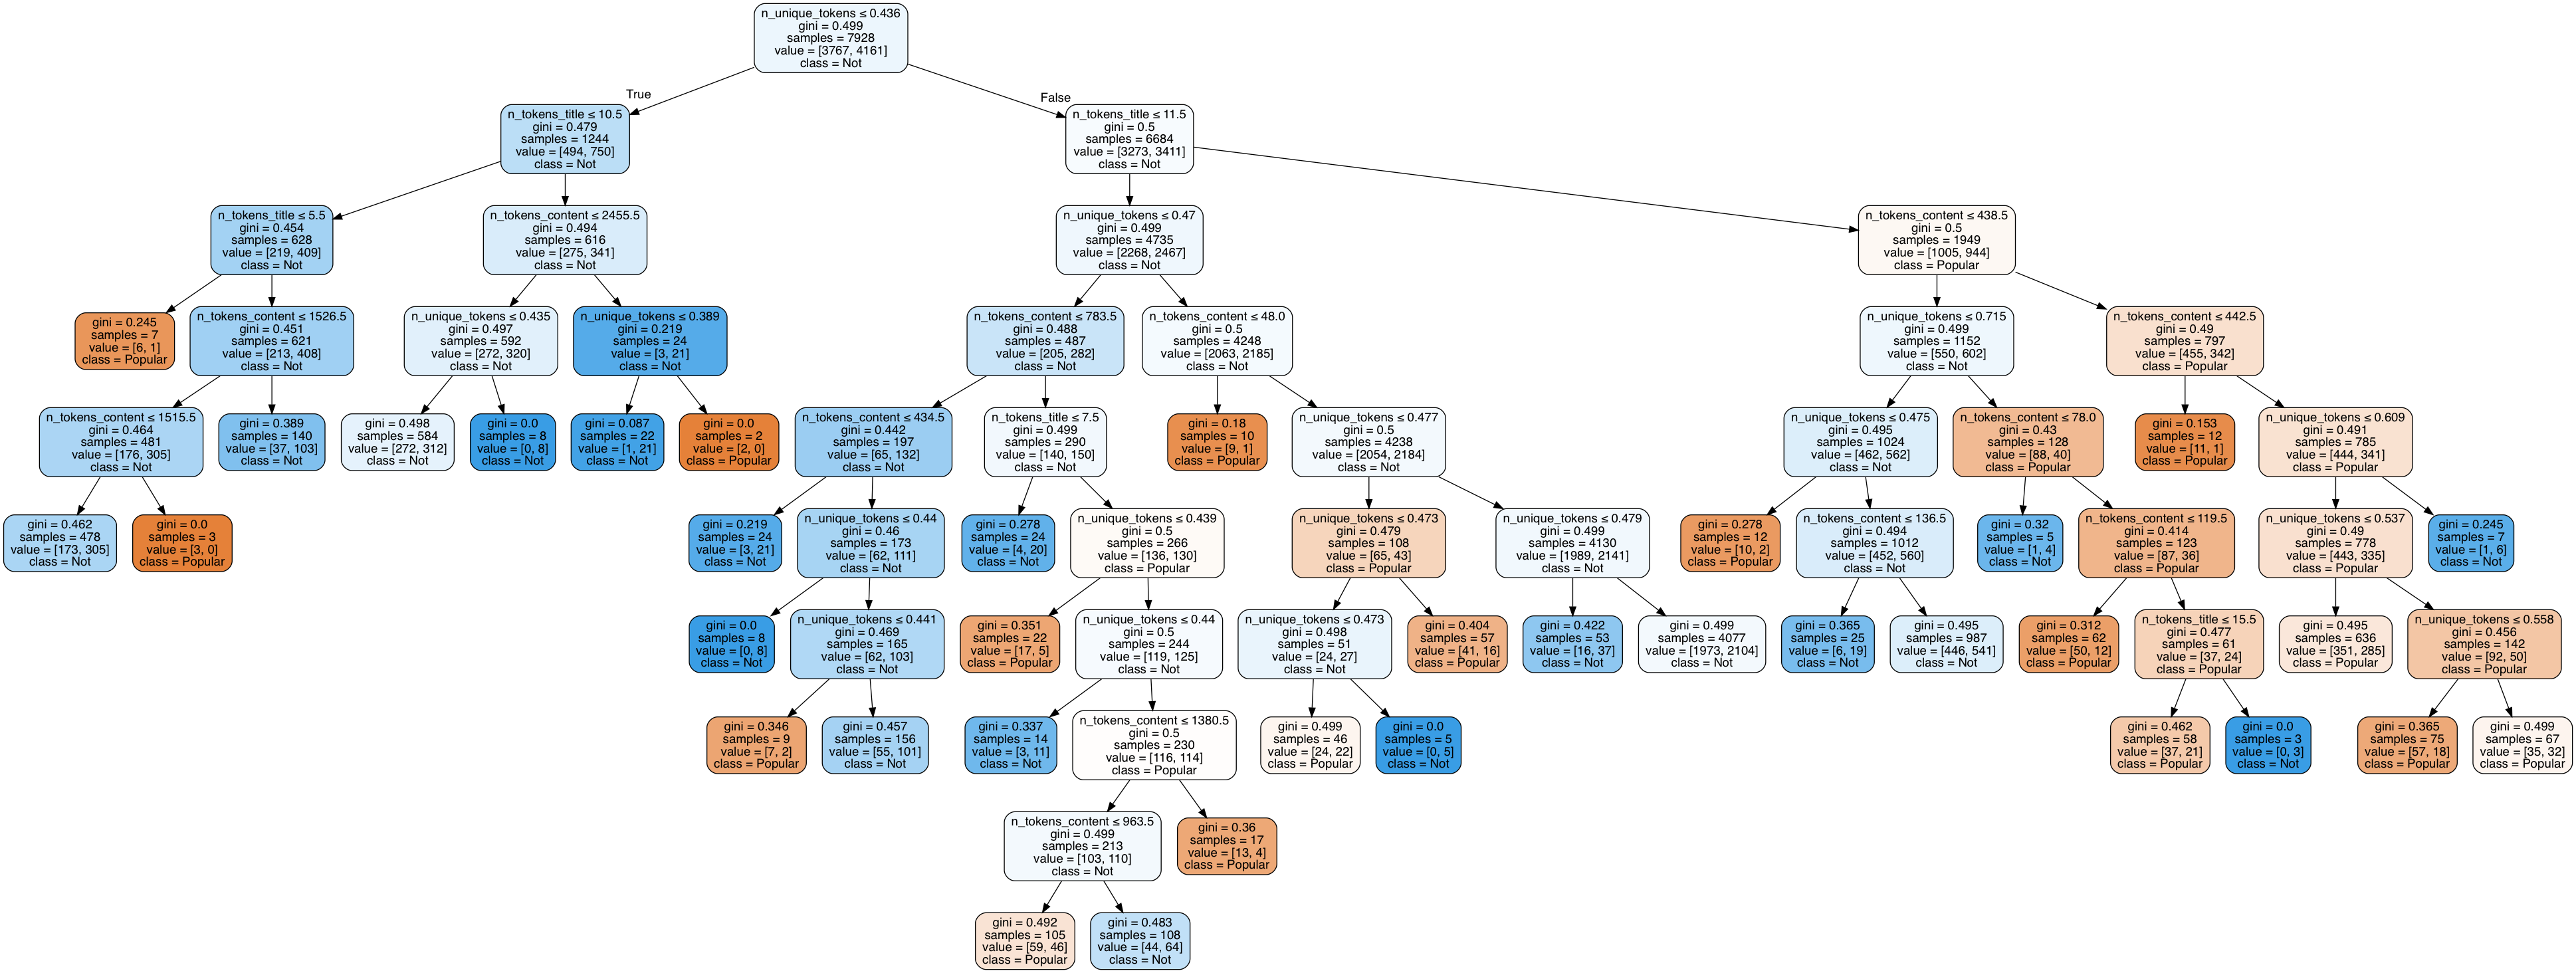

In [407]:
accuracy = []
height = []
X_train, X_test, y_train, y_test = splitData(NLP_features)

for n in range(2, 100, 2):
    height.append(n)
    model = DecisionTreeClassifier(max_leaf_nodes=n, random_state=0)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_predict))

acc = metrics.accuracy_score(y_true = y_test, y_pred = y_pred_train)
print('Accuracy on training data= ', acc)
renderTree(model, NLP_features)

feature_group.append('NLP')
accuracy.append(acc)

In [408]:
# Test content and structure related features.
Content_features = features[4:16]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Accuracy on training data=  0.5409257157270778


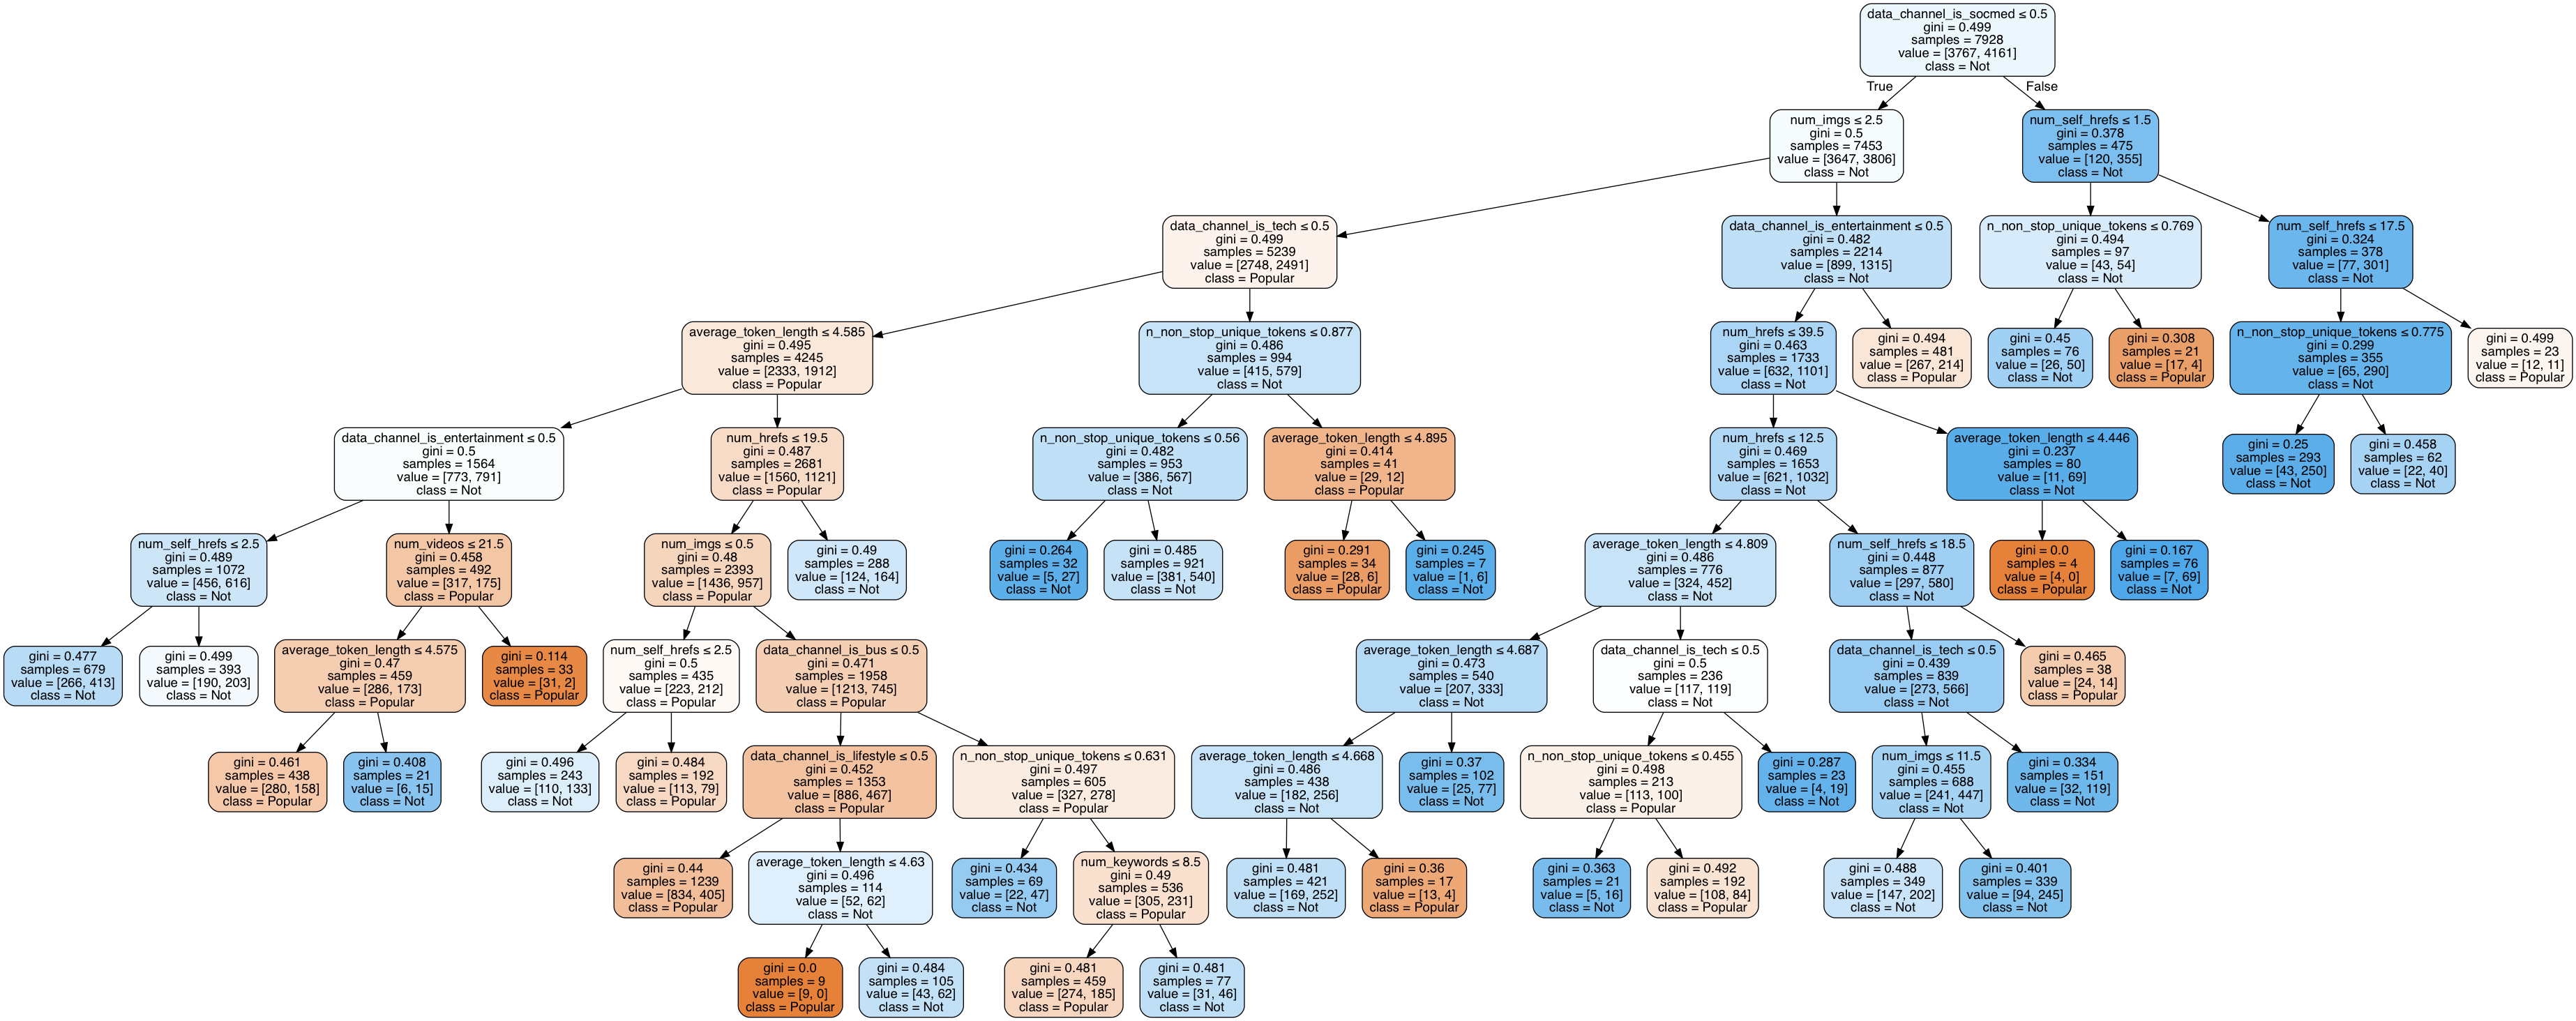

In [409]:
model = DecisionTreeClassifier(max_leaf_nodes=opt_height, random_state=0)
X_train, X_test, y_train, y_test = splitData(Content_features)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_true = y_test, y_pred = y_pred_train)
print('Accuracy on training data= ', acc)
renderTree(model, Content_features)

feature_group.append('Content')
accuracy.append(acc)

In [410]:
# Day context.
Week_context = features[29:36]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Accuracy on training data=  0.5409257157270778


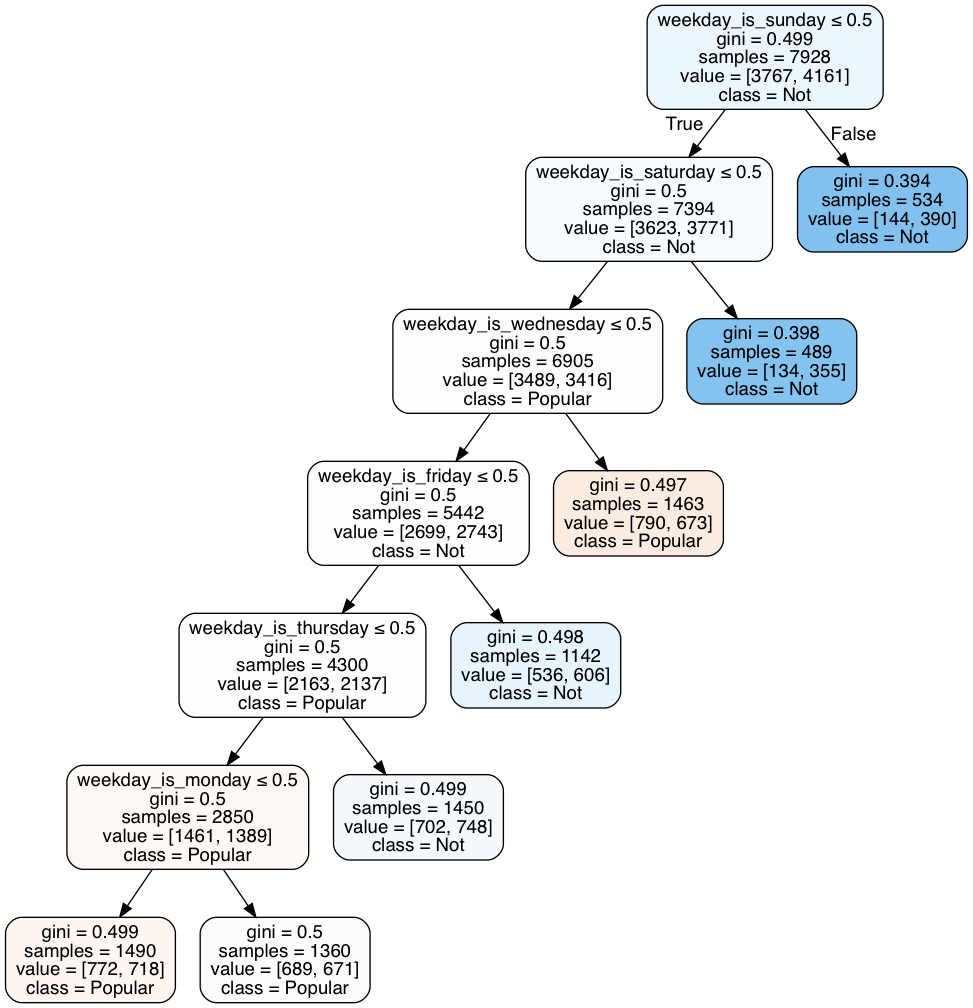

In [411]:
model = DecisionTreeClassifier(max_leaf_nodes=opt_height, random_state=0)
X_train, X_test, y_train, y_test = splitData(Week_context)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_true = y_test, y_pred = y_pred_train)
print('Accuracy on training data= ', acc)
renderTree(model, Week_context)

feature_group.append('Week_context')
accuracy.append(acc)

In [412]:
# Sentiment.
Sentiment = features[42:]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Accuracy on training data=  0.5409257157270778


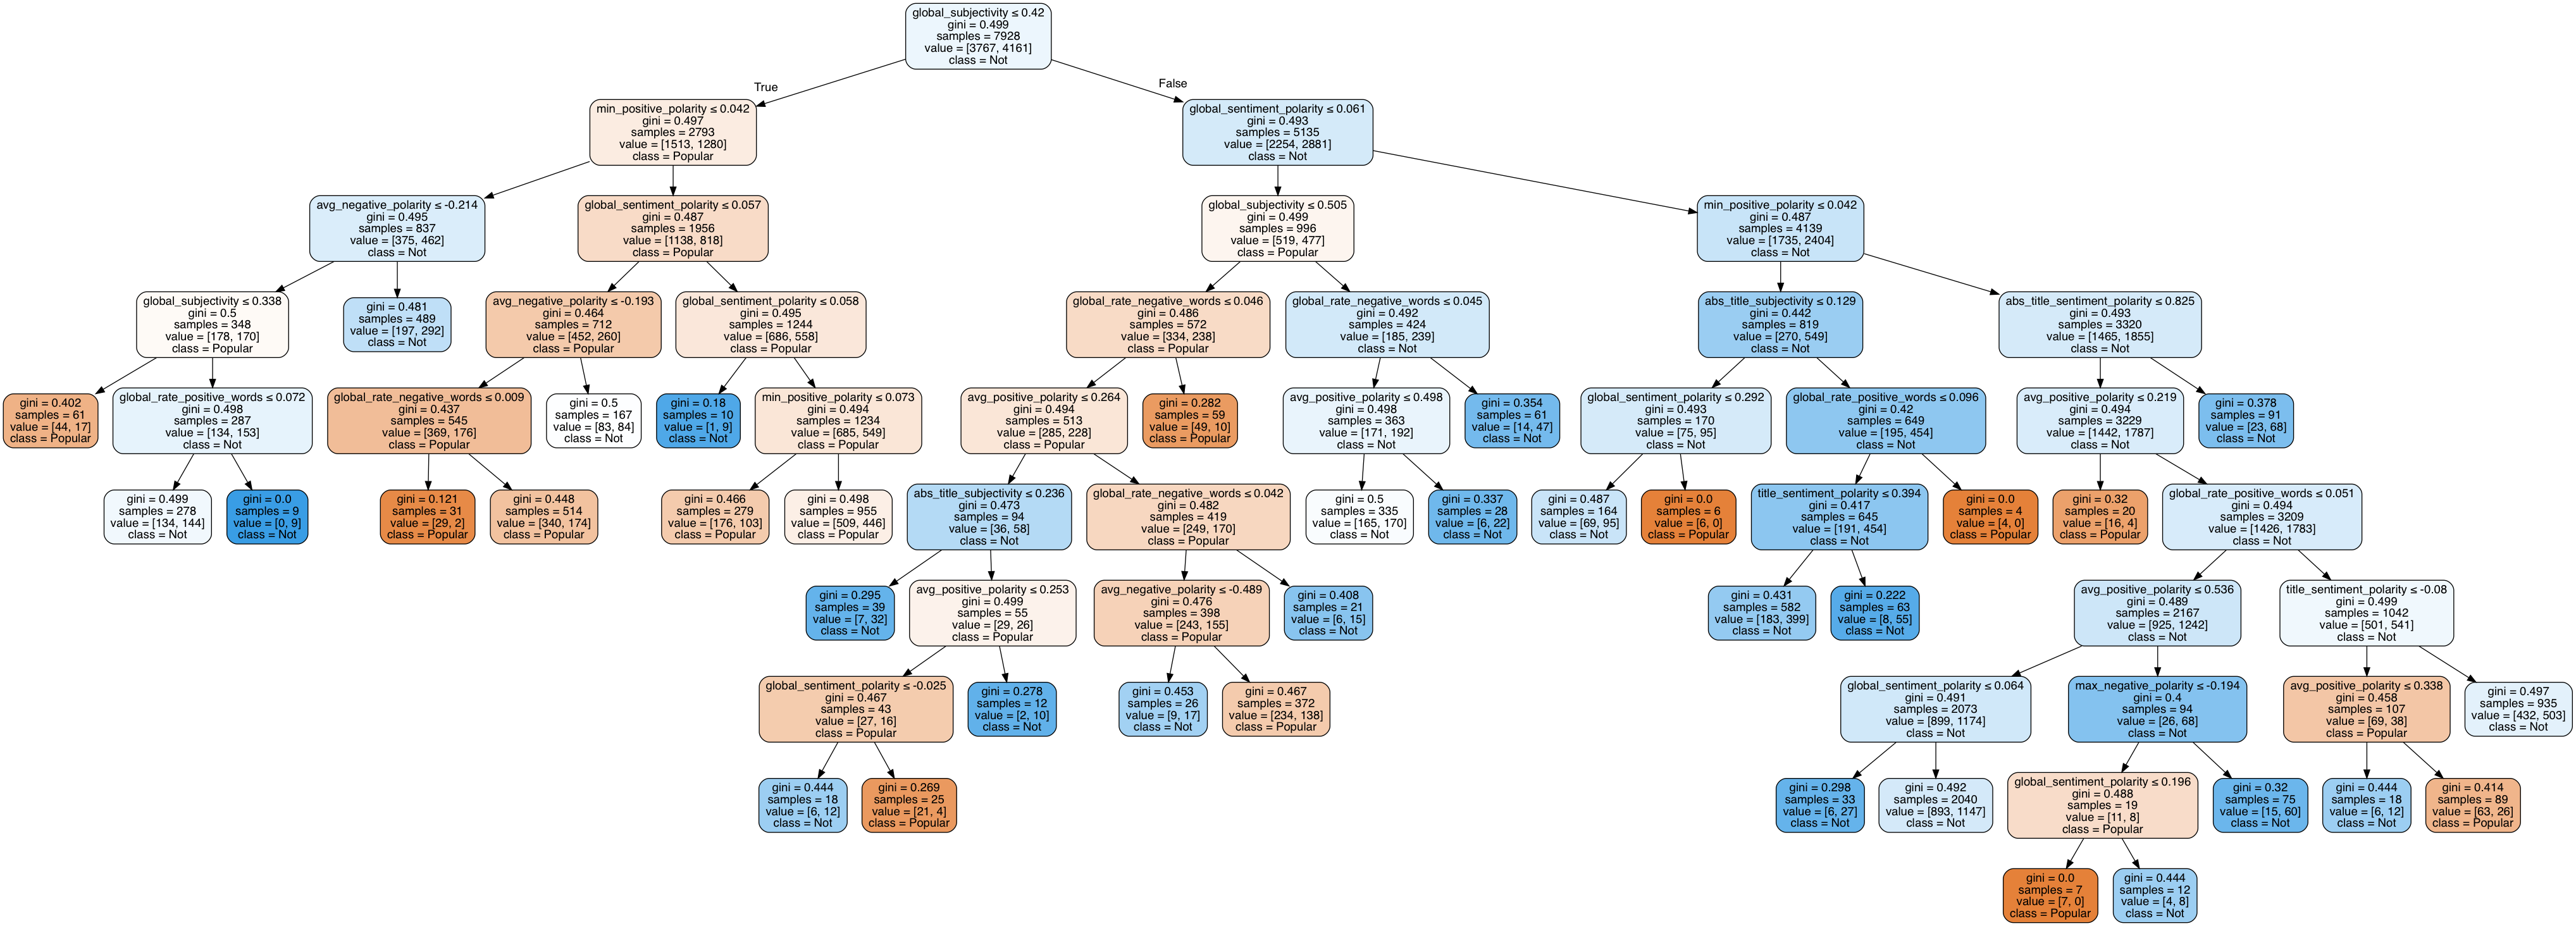

In [414]:
model = DecisionTreeClassifier(max_leaf_nodes=opt_height, random_state=0)
X_train, X_test, y_train, y_test = splitData(Sentiment)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_true = y_test, y_pred = y_pred_train)
print('Accuracy on training data= ', acc)
renderTree(model, Sentiment)

feature_group.append('Sentiment')
accuracy.append(acc)

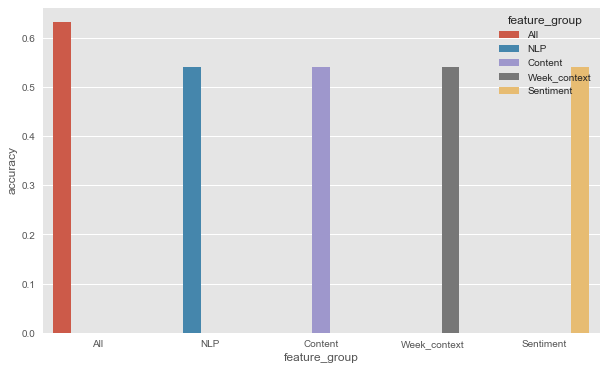

In [416]:
feature_analysis = pd.DataFrame(
{
    'feature_group' : feature_group, 
    'accuracy' : accuracy
})
ax = sns.barplot(x="feature_group", y="accuracy", hue="feature_group", data=feature_analysis)

### Task 2.6 Describe your findings
1. Which method (k-NN, SVM, Decision Tree) worked best?
+ How did different parameters influence the accuracy?
+ Which model is easiest do interpret?
+ How would you interpret your results?


**Your Solution:** TODO